# Compare mom6-panan configs

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cmocean.cm as cmocean
import matplotlib.cm as cm
from collections import OrderedDict
import glob,os
import matplotlib.colors as col
from datetime import timedelta

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)
logging.getLogger('distributed.utils_perf').setLevel(logging.ERROR)

from dask.distributed import Client

#figdir = '/g/data/v45/akm157/figures/panan/speed_movie/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41747,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:38131,Total threads: 4
Dashboard: /proxy/38865/status,Memory: 35.71 GiB
Nanny: tcp://127.0.0.1:40453,


In [3]:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

In [4]:
# build database for these experiments:
session_name = '/g/data/v45/wf4500/databases/panan2.db'
panan_session = cc.database.create_session(session_name)

# dir_list = ['/g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/', # BF and IC from yr 2 ACCESS (new run)
#            '/g/data/ik11/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/', # 1/20th with yr 2 ACCESS, dt_therm = 900.
#            '/scratch/oz91/wf4500/mom6/archive/mom6-panan/']
# cc.database.build_index(dir_list,panan_session)

In [5]:
# open 1 day of data from 1/20th:

# First try velocities:

outpath = '/scratch/e14/cs6673/mom6/archive/panan_005deg_jra55_ryf_2023_05_17/output108/20000101.ocean_daily_z_2000_001.nc'
uo = xr.open_dataset(outpath)
# extract array from dataset:
u = uo.uo.isel(time=0).sel(z_l_sub01 = 50,method='nearest')
v = uo.vo.isel(time=0).sel(z_l_sub01 = 50,method='nearest')
# q grids have 1 extra index:
v = v[1:,:]
u = u[:,1:]

# interpolate on t grid:
v = v.rename({'yq':'yh'})
v.coords['yh'] = u.yh.values
v_s = v.copy()
v_n = v.roll(yh=-1)
v_tgrid = (v_s + v_n)/2

# interpolate on t grid:
u = u.rename({'xq':'xh'})
u.coords['xh'] = v.xh.values
u_w = u.copy()
u_e = u.roll(xh=-1)
u_tgrid = (u_w + u_e)/2

speed_1_20 = np.sqrt(u_tgrid*u_tgrid + v_tgrid*v_tgrid)

(-280.0, -220.0)

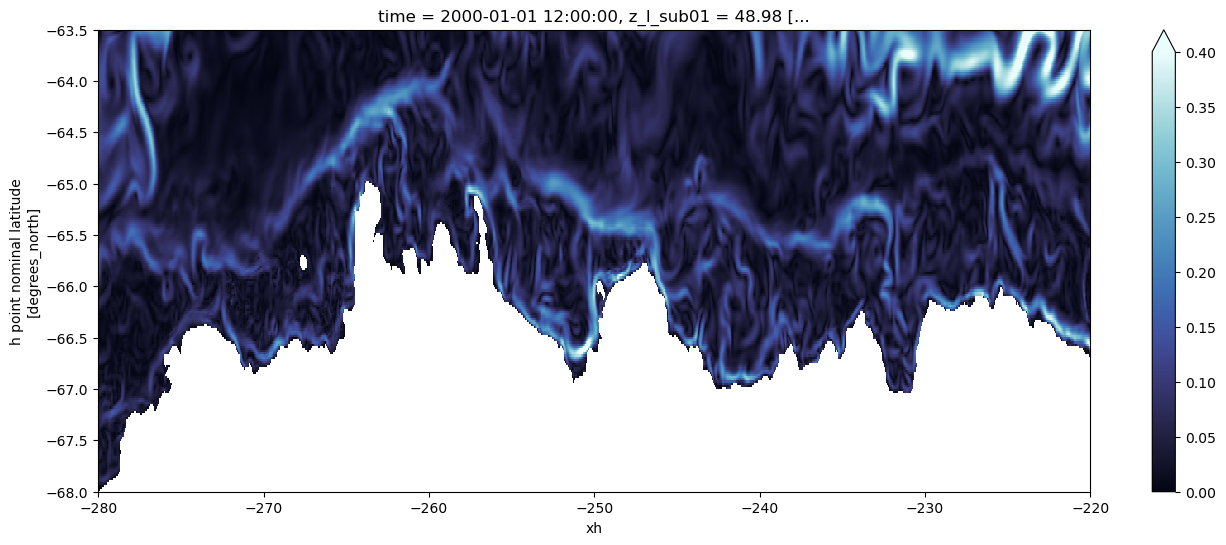

In [6]:
fig = plt.figure(1,figsize=(16,6))
speed_1_20.plot(vmin=0,vmax=.4,cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)

#plt.ylim(-79,-70)
#plt.xlim(-200,-150)

In [7]:
# open 1 day of data from 1/10th:

# First try velocities:

outpath = '/g/data/ik11/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output018/20000101.ocean_daily_z_2000_001.nc'
uo = xr.open_dataset(outpath)
# extract array from dataset:
u = uo.uo.isel(time=0).sel(z_l_sub01 = 50,method='nearest')
v = uo.vo.isel(time=0).sel(z_l_sub01 = 50,method='nearest')
# q grids have 1 extra index:
v = v[1:,:]
u = u[:,1:]

# interpolate on t grid:
v = v.rename({'yq':'yh'})
v.coords['yh'] = u.yh.values
v_s = v.copy()
v_n = v.roll(yh=-1)
v_tgrid = (v_s + v_n)/2

# interpolate on t grid:
u = u.rename({'xq':'xh'})
u.coords['xh'] = v.xh.values
u_w = u.copy()
u_e = u.roll(xh=-1)
u_tgrid = (u_w + u_e)/2

speed = np.sqrt(u_tgrid*u_tgrid + v_tgrid*v_tgrid)

(-280.0, -220.0)

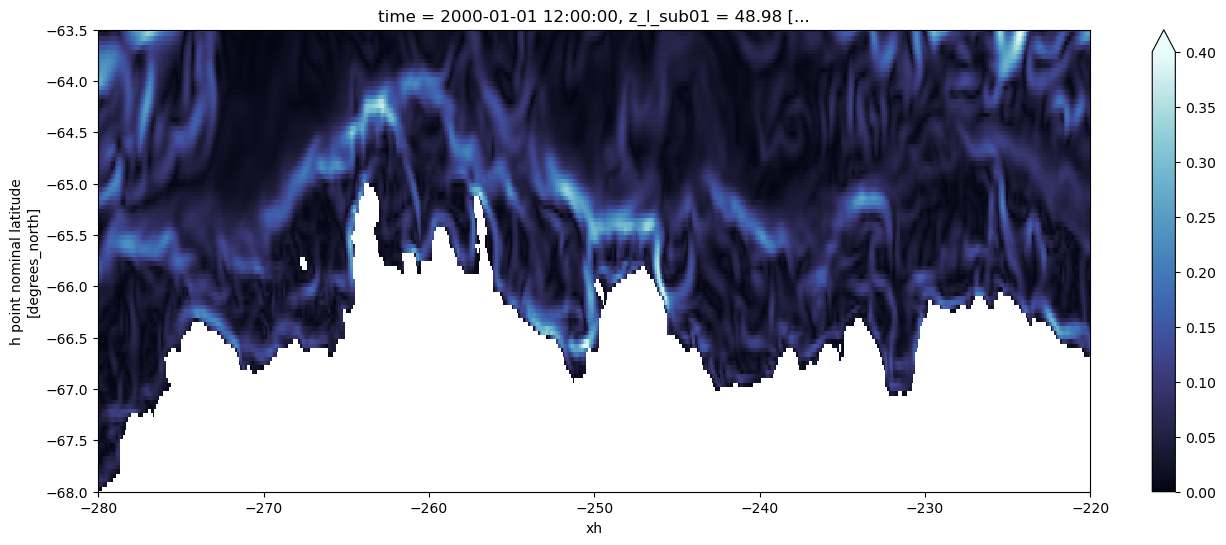

In [8]:
fig = plt.figure(1,figsize=(16,6))
speed.plot(vmin=0,vmax=.4,cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)

#plt.ylim(-79,-70)
#plt.xlim(-200,-150)

In [9]:
#panan0025
#p0025_daily=xr.open_dataset('/scratch/oz91/wf4500/panan_1day/19960801.ocean_day_speed_day1.nc')
# open 1 day of data from 1/10th:

# First try velocities:

outpath = '/scratch/oz91/wf4500/Jan_panan01/19970101.ocean_daily_day01.nc'


uo = xr.open_dataset(outpath)
# extract array from dataset:
u = uo.uo.isel(time=0).sel(z_l = 50,method='nearest')
v = uo.vo.isel(time=0).sel(z_l = 50,method='nearest')
# q grids have 1 extra index:
v = v[1:,:]
u = u[:,1:]

# interpolate on t grid:
v = v.rename({'yq':'yh'})
v.coords['yh'] = u.yh.values
v_s = v.copy()
v_n = v.roll(yh=-1)
v_tgrid = (v_s + v_n)/2

# interpolate on t grid:
u = u.rename({'xq':'xh'})
u.coords['xh'] = v.xh.values
u_w = u.copy()
u_e = u.roll(xh=-1)
u_tgrid = (u_w + u_e)/2

speed_1_40 = np.sqrt(u_tgrid*u_tgrid + v_tgrid*v_tgrid)


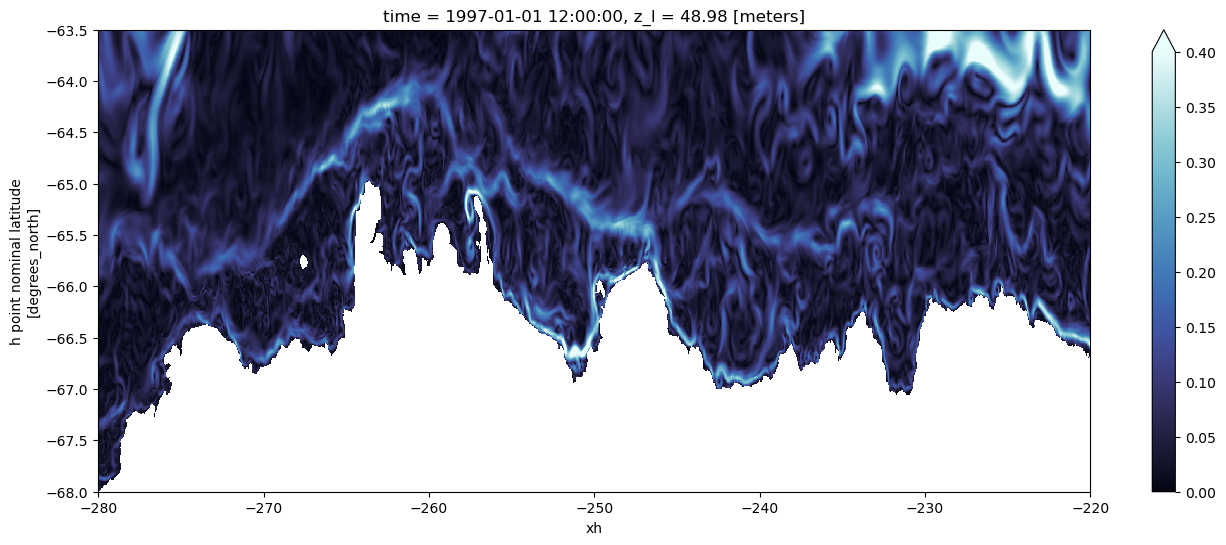

In [10]:
fig = plt.figure(1,figsize=(16,6))
speed_1_40.plot(vmin=0,vmax=.4,cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)
plt.savefig('panan0025.png',dpi=300)

#plt.ylim(-79,-70)
#plt.xlim(-200,-150)

In [11]:
xh=speed.xh
yh=speed.yh


xh2=speed_1_20.xh
yh2=speed_1_20.yh


xh4=speed_1_40.xh
yh4=speed_1_40.yh

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


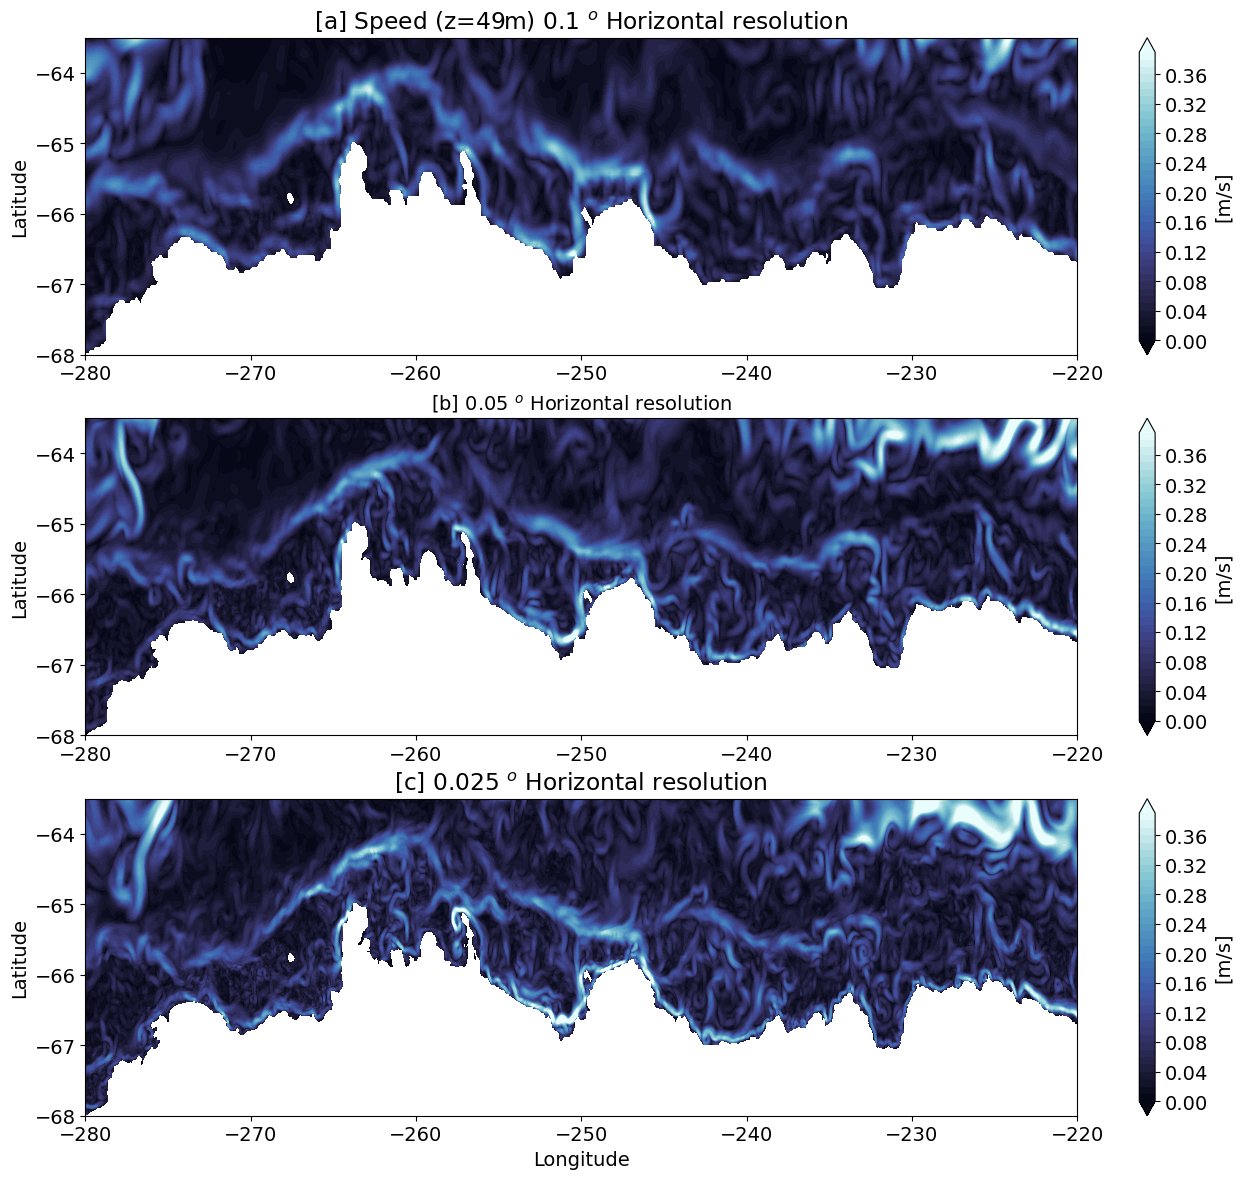

In [12]:
# YOu will ahve to remake the fig with the Month of January
import matplotlib
fig = plt.figure(1,figsize=(16,14))
fig.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.subplot(3,1,1)
plt.contourf(xh,yh,speed,np.arange(0,0.4,0.01),extend='both',cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)
plt.xlabel('')
plt.ylabel('Latitude')
cbar = plt.colorbar(); cbar.set_label('[m/s]', fontsize=14)
plt.title(r"[a] Speed (z=49m) 0.1 $^{o}$ Horizontal resolution")

plt.subplot(3,1,2)
plt.contourf(xh2,yh2,speed_1_20,np.arange(0,0.4,0.01),extend='both',cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)
plt.xlabel('')
plt.ylabel('Latitude')
cbar = plt.colorbar(); cbar.set_label('[m/s]')
plt.title(r"[b] 0.05 $^{o}$ Horizontal resolution", fontsize=14)

plt.subplot(3,1,3)
plt.contourf(xh4,yh4,speed_1_40,np.arange(0,0.4,0.01),extend='both',cmap = cmocean.ice)
plt.ylim(-68,-63.5)
plt.xlim(-280,-220)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(); cbar.set_label('[m/s]', fontsize=14)
plt.title(r"[c] 0.025 $^{o}$ Horizontal resolution")

plt.savefig('panan_resol.png',dpi=300)

In [17]:
# test of importing daily uv collated data
outpath = '/scratch/oz91/wf4500/mom6/archive/mom6-panan/output067/19960801.ocean_day_speed.nc'
daily_uv = xr.open_dataset(outpath)

(-200.0, -150.0)

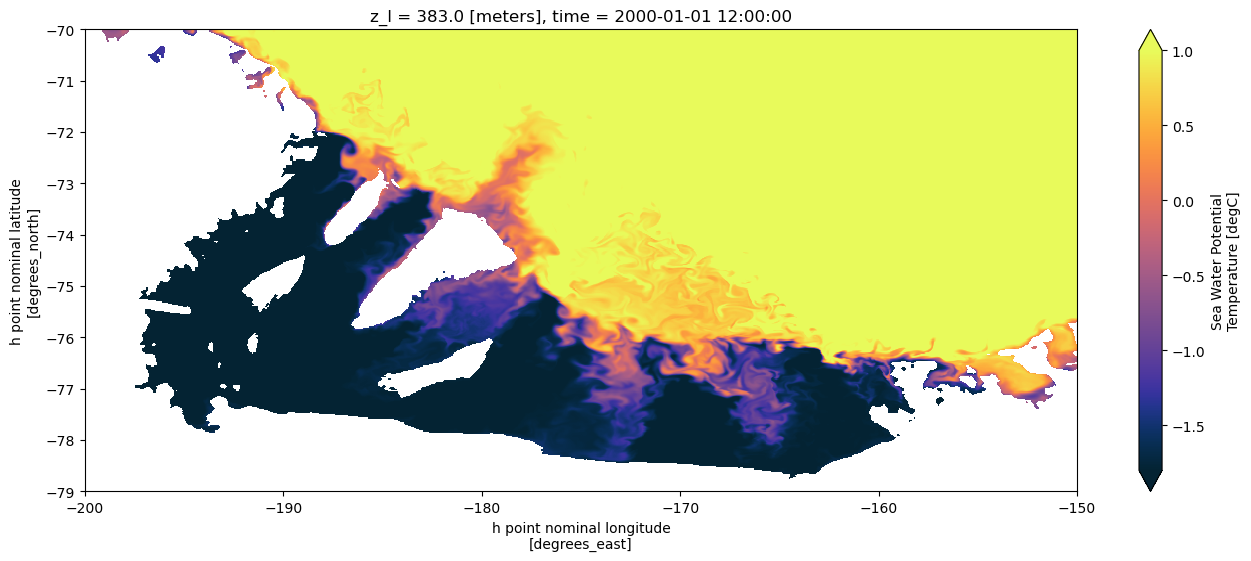

In [39]:
# open 1 day of data from 1/20th:

# Now temperature:

outpath = '/scratch/e14/cs6673/mom6/archive/panan_005deg_jra55_ryf_2023_05_17/output108/20000101.ocean_daily_z_2000_001.nc'
thetao = xr.open_dataset(outpath)
# extract array from dataset:
temp_1_20 = thetao.thetao.isel(time=0).sel(z_l = 400,method='nearest')

fig = plt.figure(1,figsize=(16,6))
temp_1_20.plot(vmin=-1.8,vmax=1,cmap = cmocean.thermal)
#plt.ylim(-68,-63.5)
#plt.xlim(-280,-220)

plt.ylim(-79,-70)
plt.xlim(-200,-150)

(-200.0, -150.0)

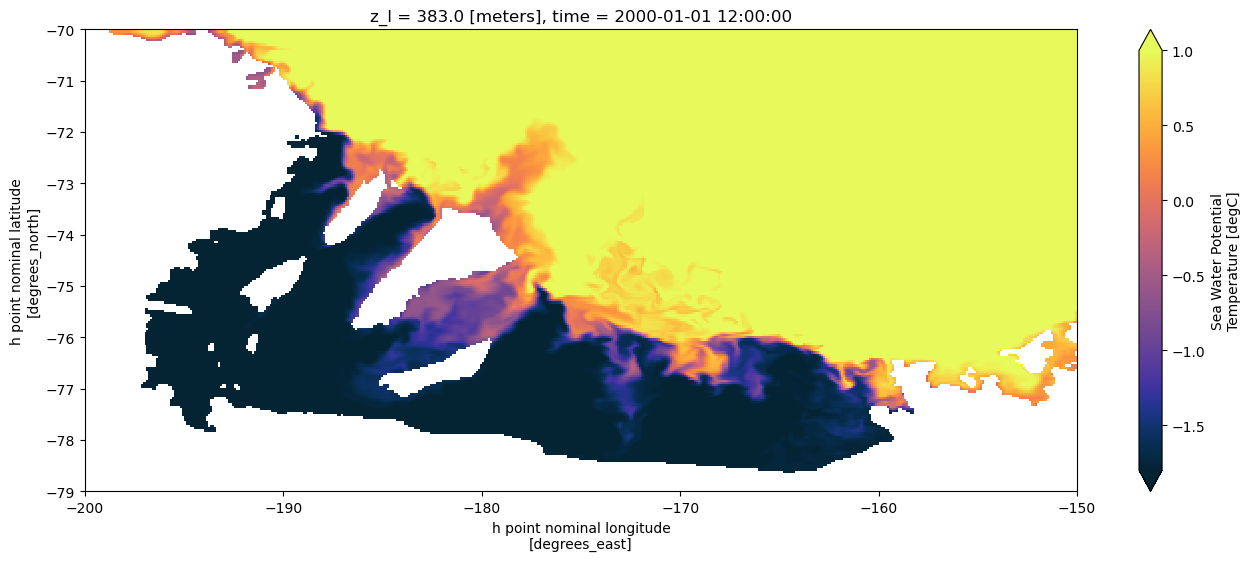

In [40]:
# open 1 day of data from 1/10th:

# Now temperature:

outpath = '/scratch/x77/akm157/mom6/archive/panant-01-zstar-ACCESSyr2/output018/20000101.ocean_daily_z_2000_001.nc'
thetao = xr.open_dataset(outpath)
# extract array from dataset:
temp = thetao.thetao.isel(time=0).sel(z_l = 400,method='nearest')

fig = plt.figure(1,figsize=(16,6))
temp.plot(vmin=-1.8,vmax=1,cmap = cmocean.thermal)
#plt.ylim(-68,-63.5)
#plt.xlim(-280,-220)

plt.ylim(-79,-70)
plt.xlim(-200,-150)

## DSW export across 1000m isobath:

In [36]:
lat_slice = slice(-90,-59)
expt = 'panant-01-zstar-v13'

# open contour data:
isobath_depth = 1000
outfile = ('/g/data/v45/akm157/model_data/access-om2/Antarctic_slope_contour_' +
           str(isobath_depth) + 'm.npz')
data = np.load(outfile)
mask_y_transport = data['mask_y_transport']
mask_x_transport = data['mask_x_transport']
mask_y_transport_numbered = data['mask_y_transport_numbered']
mask_x_transport_numbered = data['mask_x_transport_numbered']

yh = cc.querying.getvar(expt, 'yh', master_session, n=1)
yh = yh.sel(yh=lat_slice)
yq = cc.querying.getvar(expt, 'yq', master_session, n=1)
yq = yq.sel(yq=lat_slice)
yq = yq[1:]
xh = cc.querying.getvar(expt, 'xh', master_session, n=1)
xq = cc.querying.getvar(expt, 'xq', master_session, n=1)[1:]

# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for vmo, so like vmo this should have dimensions (yq, xh).
#       The x masks are used for umo, so like umo this should have dimensions (yh, xq).
#       However the actual name will always be simply y or x irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.
mask_x_transport = xr.DataArray(
    mask_x_transport, coords=[('y', yh.data), ('x', xq.data)])
mask_y_transport = xr.DataArray(
    mask_y_transport, coords=[('y', yq.data), ('x', xh.data)])
mask_x_transport_numbered = xr.DataArray(
    mask_x_transport_numbered, coords=[('y', yh.data), ('x', xq.data)])
mask_y_transport_numbered = xr.DataArray(
    mask_y_transport_numbered, coords=[('y', yq.data), ('x', xh.data)])

# number of points along contour:
num_points = int(np.maximum(
    np.max(mask_y_transport_numbered),np.max(mask_x_transport_numbered)))

# stack contour data into 1d:
mask_x_numbered_1d = mask_x_transport_numbered.stack(contour_index = ['y', 'x'])
mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)
mask_y_numbered_1d = mask_y_transport_numbered.stack(contour_index = ['y', 'x'])
mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)
contour_ordering = xr.concat((mask_x_numbered_1d,mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)

# get lat and lon along contour, useful for plotting later:
lat_along_contour = contour_ordering.y
lon_along_contour = contour_ordering.x
contour_index_array = np.arange(1,len(contour_ordering)+1)
# don't need the multi-index anymore, replace with contour count and save
lat_along_contour = lat_along_contour.drop_vars({'x', 'y', 'contour_index'})
lat_along_contour.coords['contour_index'] = contour_index_array
lon_along_contour = lon_along_contour.drop_vars({'x', 'y', 'contour_index'})
lon_along_contour.coords['contour_index'] = contour_index_array

In [37]:
start_time = '1991-01-01'
end_time = '2060-12-31'

rho_0 = 1035.0

def cross_isobath_transport(expt,session):

    # good panan:
    vmo = cc.querying.getvar(expt, 'vmo', session, frequency='1 monthly',start_time=start_time,end_time=end_time)
    umo = cc.querying.getvar(expt, 'umo', session, frequency='1 monthly',start_time=start_time,end_time=end_time)

    # select latitude range and this year:
    vmo = vmo.sel(yq=lat_slice).sel(rho2_l=slice(1037.15, None)).sel(time=slice(start_time,end_time)).sum('rho2_l').groupby('time.year').mean('time')
    vmo = vmo.isel(yq=slice(1, None))
    umo = umo.sel(yh=lat_slice).sel(rho2_l=slice(1037.15, None)).sel(time=slice(start_time,end_time)).sum('rho2_l').groupby('time.year').mean('time')
    umo = umo.isel(xq=slice(1, None))

    # Note that vmo is Ocean Mass Y Transport (kg s-1) and defined as the transport across
    # the northern edge of a tracer cell so its coordinates should be (yq, xh).
    # umo is Ocean Mass X Transport (kg s-1) and defined as the transport across
    # the eastern edge of a tracer cell so its coordinates should be (yh, xq).
    # However we will keep the actual name as simply y/x irrespective of the variable
    # to make concatenation and sorting possible.
    vmo = vmo.rename({'yq':'y', 'xh':'x'})
    umo = umo.rename({'yh':'y', 'xq':'x'})

    # convert kg/s to Sv and multiply by contour masks
    vmo = (vmo/(1e6*rho_0)*mask_y_transport).compute()
    umo = (umo/(1e6*rho_0)*mask_x_transport).compute()

    # stack transports into 1d and drop any points not on contour:
    x_transport_1d = umo.stack(contour_index=['y', 'x'])
    x_transport_1d = x_transport_1d.where(mask_x_numbered_1d>0, drop=True)
    y_transport_1d = vmo.stack(contour_index=['y', 'x'])
    y_transport_1d = y_transport_1d.where(mask_y_numbered_1d>0, drop=True)

    # combine all points on contour:
    vol_trans_across_contour = xr.concat((x_transport_1d, y_transport_1d), dim='contour_index')
    vol_trans_across_contour = vol_trans_across_contour.sortby(contour_ordering)
    vol_trans_across_contour = vol_trans_across_contour.drop_vars({'x', 'contour_index', 'y'})
    vol_trans_across_contour.coords['contour_index'] = contour_index_array
    vol_trans_across_contour = (vol_trans_across_contour.sum('contour_index')).compute()
    
    return vol_trans_across_contour

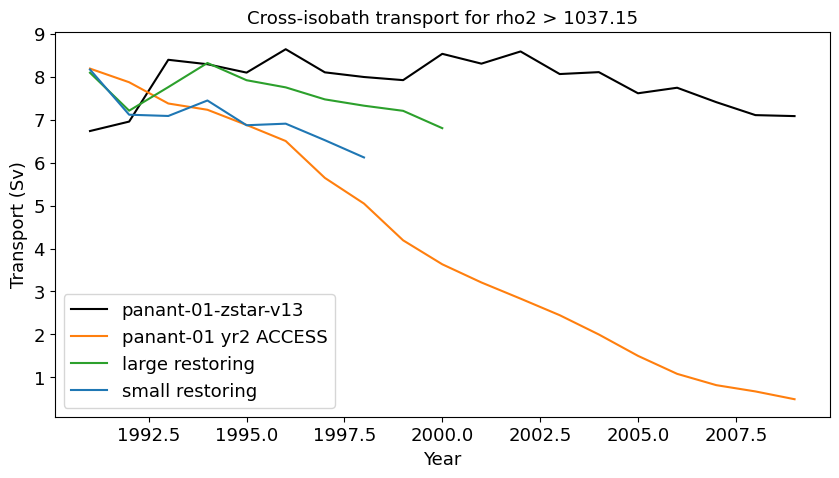

In [38]:
fontsize=13
plt.figure(figsize=(10,5))

# old panan-01
end_time = '2009-12-31'
vol_trans_across_contour = cross_isobath_transport('panant-01-zstar-v13',master_session)
vol_trans_across_contour.plot(label='panant-01-zstar-v13',color='k')

# new 1/20th
#vol_trans_across_contour = cross_isobath_transport('panan_005deg_jra55_ryf',twentieth_session)
#vol_trans_across_contour.plot(label='new 1/20th',color='C0')

# panan-01 yr2 ACCESS
vol_trans_across_contour = cross_isobath_transport('panan-01-zstar-yr2forcing',panan_session)
vol_trans_across_contour.plot(label='panant-01 yr2 ACCESS',color='C1')

end_time = '2000-12-31'
# panan-01-test-oldparams
vol_trans_across_contour = cross_isobath_transport('panan-01-test-oldparams',panan_session)
vol_trans_across_contour.plot(label='large restoring',color='C2')

end_time = '1998-12-31'
# panan-01-smallrestore
vol_trans_across_contour = cross_isobath_transport('panan-01-smallrestore',panan_session)
vol_trans_across_contour.plot(label='small restoring',color='C0')

plt.legend(fontsize=fontsize)
plt.title(r'Cross-isobath transport for rho2 > 1037.15',fontsize=fontsize)
plt.ylabel('Transport (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Check shelf salinity:

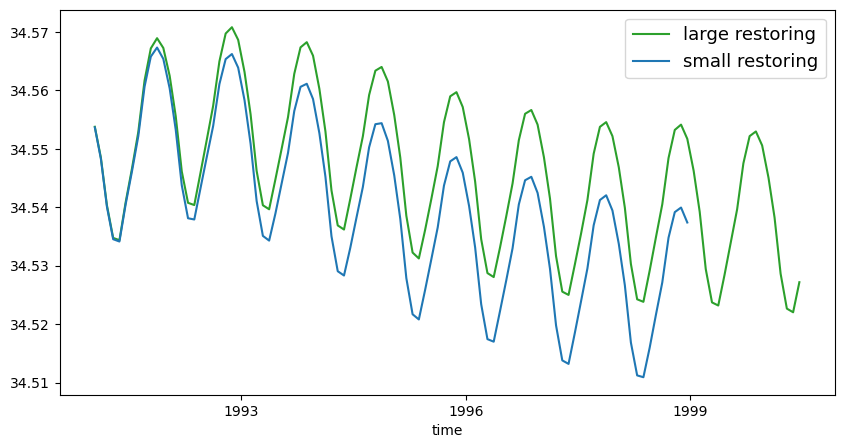

In [30]:
# bottom:

fontsize=13
plt.figure(figsize=(10,5))

start_time = '1991-01-01'
end_time = '2060-12-31'

contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
shelf_mask = contour_file['contour_masked_above']
yt_ocean = contour_file['yt_ocean']
xt_ocean = contour_file['xt_ocean']
# Mask values that are non-zero
shelf_mask[np.where(shelf_mask!=0)] = np.nan
shelf_mask = shelf_mask+1
shelf_mask = xr.DataArray(shelf_mask, coords = [('yh', yt_ocean), ('xh', xt_ocean)])

# This is not masked properly over land:
area = cc.querying.getvar('panan-01-test-oldparams','areacello', panan_session,n=1)
area = area*shelf_mask

salt_bottom = cc.querying.getvar('panan-01-test-oldparams','sob', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_bottom = salt_bottom*area

# mask area properly before summing:
area_sum = (area*(salt_bottom[0,...]*0+1)).sum()

(salt_bottom.sum('xh').sum('yh')/area_sum).plot(label='large restoring',color='C2')

salt_bottom = cc.querying.getvar('panan-01-smallrestore','sob', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_bottom = salt_bottom*area
(salt_bottom.sum('xh').sum('yh')/area_sum).plot(label='small restoring',color='C0')

plt.legend(fontsize=fontsize)

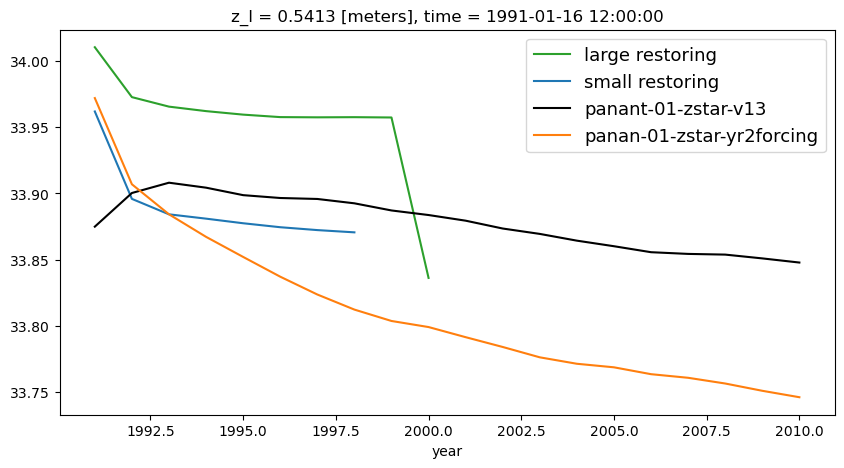

In [35]:
# surface:

fontsize=13
plt.figure(figsize=(10,5))

start_time = '1991-01-01'
end_time = '2010-12-31'

contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
shelf_mask = contour_file['contour_masked_above']
yt_ocean = contour_file['yt_ocean']
xt_ocean = contour_file['xt_ocean']
# Mask values that are non-zero
shelf_mask[np.where(shelf_mask!=0)] = np.nan
shelf_mask = shelf_mask+1
shelf_mask = xr.DataArray(shelf_mask, coords = [('yh', yt_ocean), ('xh', xt_ocean)])

# This is not masked properly over land:
area = cc.querying.getvar('panan-01-test-oldparams','areacello', panan_session,n=1)
area = area*shelf_mask

salt_top = cc.querying.getvar('panan-01-test-oldparams','so', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_top = (salt_top.sel(yh=slice(-90,-59)).sel(z_l=0,method='nearest')*area).groupby('time.year').mean('time')

# mask area properly before summing:
area_sum = (area*(salt_bottom[0,...]*0+1)).sum()

(salt_top.sum('xh').sum('yh')/area_sum).plot(label='large restoring',color='C2')

salt_top = cc.querying.getvar('panan-01-smallrestore','so', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_top = (salt_top.sel(yh=slice(-90,-59)).sel(z_l=0,method='nearest')*area).groupby('time.year').mean('time')
(salt_top.sum('xh').sum('yh')/area_sum).plot(label='small restoring',color='C0')

salt_top = cc.querying.getvar('panant-01-zstar-v13','so', master_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_top = (salt_top.sel(yh=slice(-90,-59)).sel(z_l=0,method='nearest')*area).groupby('time.year').mean('time')
(salt_top.sum('xh').sum('yh')/area_sum).plot(label='panant-01-zstar-v13',color='k')

salt_top = cc.querying.getvar('panan-01-zstar-yr2forcing','so', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time)
salt_top = (salt_top.sel(yh=slice(-90,-59)).sel(z_l=0,method='nearest')*area).groupby('time.year').mean('time')
(salt_top.sum('xh').sum('yh')/area_sum).plot(label='panan-01-zstar-yr2forcing',color='C1')

plt.legend(fontsize=fontsize)

## Meridional transport at 40S

panant-01-zstar-v13,  9
1/10th,  9
1/20th,  9
1/40th,  9


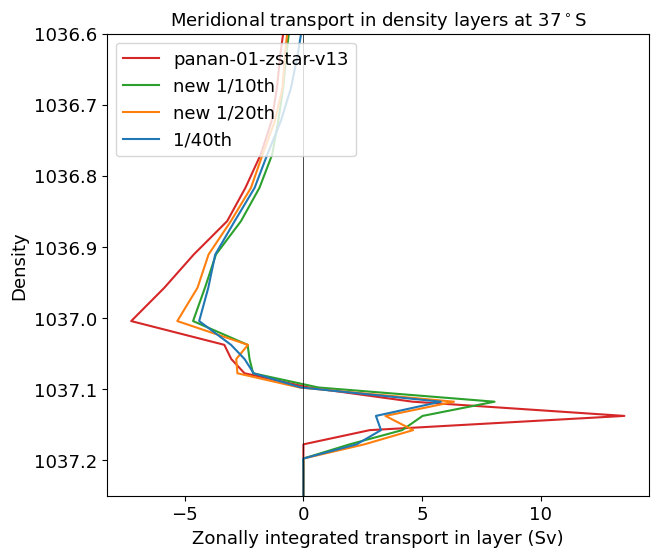

In [20]:
# NOTE changed to first 9 months only!!!

start_time = '1991-01-01'
end_time = '1991-09-30'

latitude = -37

plt.figure(figsize=(7,6))
fontsize=13

# good panan:
psi = cc.querying.getvar('panant-01-zstar-v13', 'vmo', master_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-01-zstar-v13, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='panan-01-zstar-v13',color='C3')

# new panan-01:
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('1/10th, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='new 1/10th',color='C2')

'''# replica panan exact:
psi = cc.querying.getvar('panan-01-zstar-v13-exact', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-01-zstar-v13-exact, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='DT_THERM=1800',color='C1')

# replica panan exact:
psi = cc.querying.getvar('panan-01-zstar-v13-exact_dt3600', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-01-zstar-v13-exact_dt3600, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='DT_THERM=3600',color='C2')'''

'''# old 1/20th:
psi = cc.querying.getvar('panant-v2', 'vmo', master_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-v2, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='old 1/20th',color='k',linestyle='--')'''

'''# new 1/20th, DT_THERM = 900:
psi = cc.querying.getvar('panant-005-zstar-v13_dt900', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-005-zstar-v13_dt900, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='new 1/20th, old BF, DT_THERM = 900',color='C0',linestyle='--')

# new 1/20th, DT_THERM = 1200:
psi = cc.querying.getvar('panant-005-zstar-v13_dt1200', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panant-005-zstar-v13_dt1200, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='new 1/20th, old BF, DT_THERM = 1200',color='C2',linestyle='--')'''

# new 1/20th, DT_THERM = 900:
psi = cc.querying.getvar('panan_005deg_jra55_ryf', 'vmo', twentieth_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('1/20th, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='new 1/20th',color='C1')

# new 1/40th, DT_THERM = 600:
psi = cc.querying.getvar('mom6-panan', 'vmo', fortieth_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('1/40th, ',len(psi.time))
# yq has fill values in land for some reason...
psi = psi.isel(yq=slice(3000,None))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='1/40th',color='C0')

'''# new OM4 case
psi = cc.querying.getvar('panan-01-zstar_OM4_IC_BF', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panan-01-zstar_OM4_IC_BF ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='panan-01, OM4',color='C1')

# new yr 2 ACCESS case
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=slice(start_time,end_time))
print('panan-01-zstar-yr2forcing, ',len(psi.time))
psi = psi.sel(yq=latitude, method='nearest').sum('xh').mean('time')
#psi = psi.cumsum('rho2_l') - psi.sum('rho2_l')
(psi/1e9).plot(y='rho2_l',ylim=(1037.5,1034),label='panan-01, yr2 ACCESS',color='C2')'''

plt.plot([0,0],[1037.25,1036.6],color='k',linewidth=0.5)
plt.ylim(1037.25,1036.6)
plt.xlabel('Zonally integrated transport in layer (Sv)',fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)
plt.legend(fontsize=fontsize,loc=2)
plt.title('Meridional transport in density layers at '+str(-latitude)+r'$^\circ$S',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

# replica from github was identical to panant-01-zstar-v13. Now try changing initial conditions only.

## ACC Transport
Note 12 month rolling mean applied.

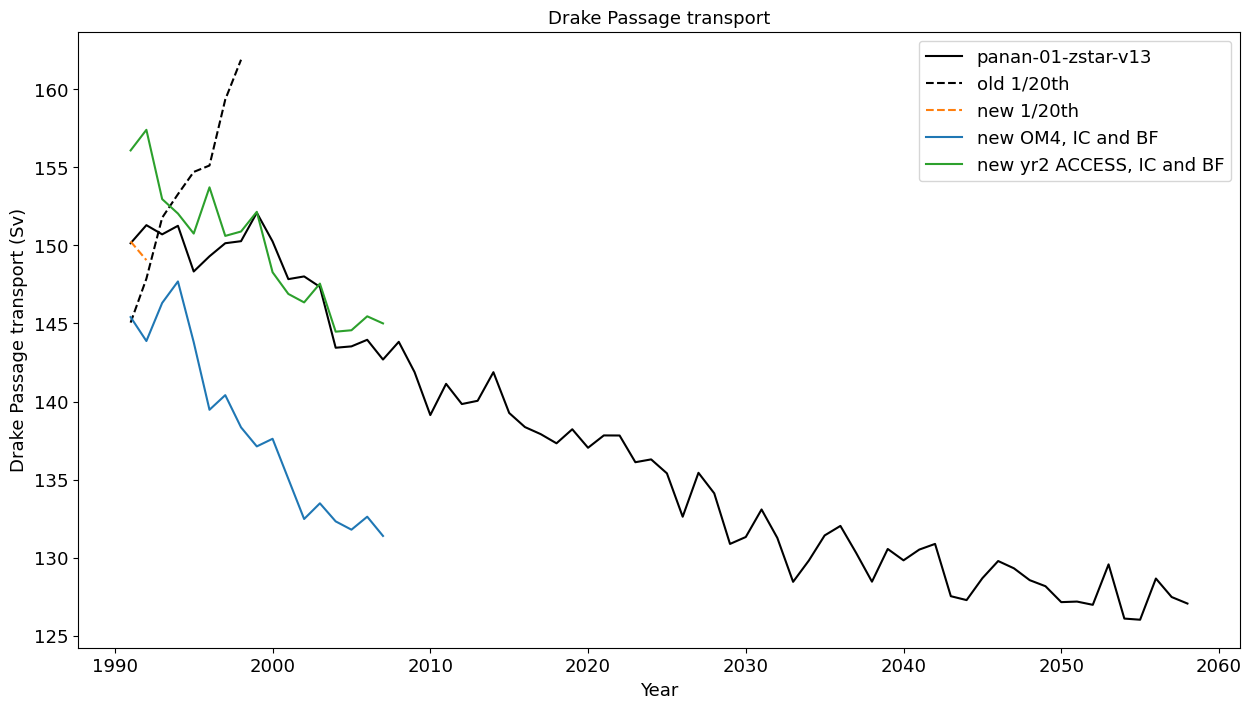

In [5]:
plt.figure(figsize=(15,8))
fontsize=13

# good panan:
umo_2d = cc.querying.getvar('panant-01-zstar-v13', 'umo_2d', master_session,frequency='1 monthly',start_time='1991-01-01',end_time='2100-12-31')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').groupby('time.year').mean('time').compute()/1e9
DP_transp.plot(label='panan-01-zstar-v13',color='k')

# old 1/20th
umo_2d = cc.querying.getvar('panant-v2', 'umo_2d', master_session,frequency='1 monthly')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').groupby('time.year').mean('time').compute()/1e9
DP_transp.plot(label='old 1/20th',color='k',linestyle='--')

# new 1/20th short time step:
umo_2d = cc.querying.getvar('panant-005-zstar-v13_dt900', 'umo_2d', panan_session,frequency='1 monthly')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').groupby('time.year').mean('time').compute()/1e9
DP_transp.plot(label='new 1/20th',color='C1',linestyle='--')

'''# original OM4 panan:
umo_2d = cc.querying.getvar('panan-01-zstar-om4BC', 'umo_2d', panan_session,frequency='1 monthly')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').rolling(time=12, center=True).mean().compute()/1e9
DP_transp.plot(label='orig OM4 panan',color='C2')'''

# new OM4 case
umo_2d = cc.querying.getvar('panan-01-zstar_OM4_IC_BF', 'umo_2d', panan_session,frequency='1 monthly')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').groupby('time.year').mean('time').compute()/1e9
DP_transp.plot(label='new OM4, IC and BF',color='C0')

# new yr 2 ACCESS case
umo_2d = cc.querying.getvar('panan-01-zstar-yr2forcing', 'umo_2d', panan_session,frequency='1 monthly')
DP_transp = umo_2d.sel(xq=-71,method='nearest').sel(yh=slice(-82,-50)).sum('yh').groupby('time.year').mean('time').compute()/1e9
DP_transp.plot(label='new yr2 ACCESS, IC and BF',color='C2')

plt.legend(fontsize=fontsize)
plt.title('Drake Passage transport',fontsize=fontsize)
plt.ylabel('Drake Passage transport (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Abyssal ocean temperature, below 4000m

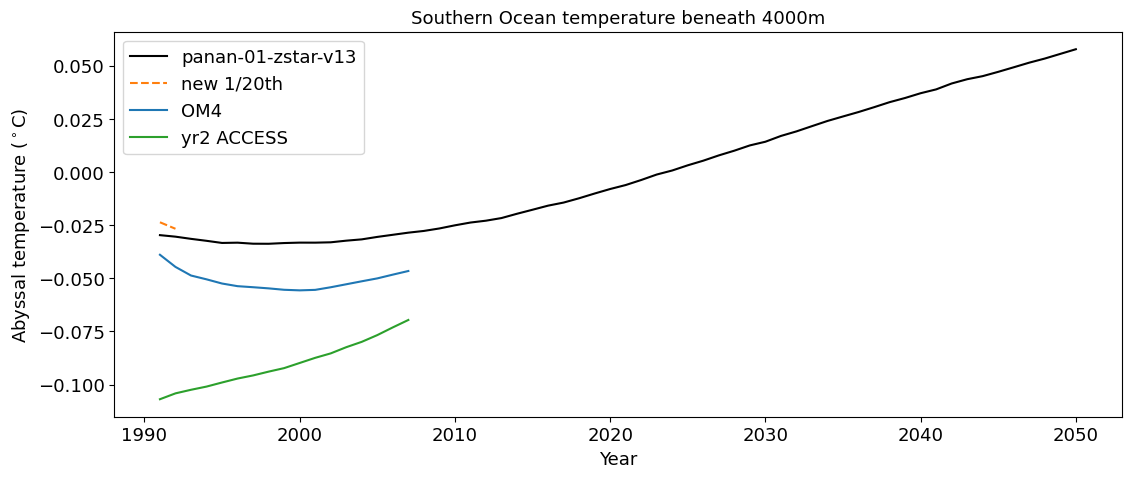

In [6]:

# NOT THICKNESS WEIGHTED!!!

fontsize = 13

fig  = plt.figure(1, figsize = (13,5))

abyss_temp = cc.querying.getvar('panant-01-zstar-v13', 'thetao', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2050-12-31')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='panan-01-zstar-v13',color='k')

'''abyss_temp = cc.querying.getvar('panant-v2', 'thetao', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2000-12-31')
abyss_temp = abyss_temp.sel(z_l=slice(3000,6000)).mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='old 1/20th',color='k',linestyle = '--')'''

abyss_temp = cc.querying.getvar('panant-005-zstar-v13_dt900', 'thetao', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='new 1/20th',color='C1',linestyle = '--')

abyss_temp = cc.querying.getvar('panan-01-zstar_OM4_IC_BF', 'thetao', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='OM4',color='C0')

abyss_temp = cc.querying.getvar('panan-01-zstar-yr2forcing', 'thetao', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='yr2 ACCESS',color='C2')

plt.legend(fontsize=fontsize)
plt.title(r'Southern Ocean temperature beneath 4000m',fontsize=fontsize)
plt.ylabel(r'Abyssal temperature ($^\circ$C)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)


## Abyssal ocean salinity, below 4000m

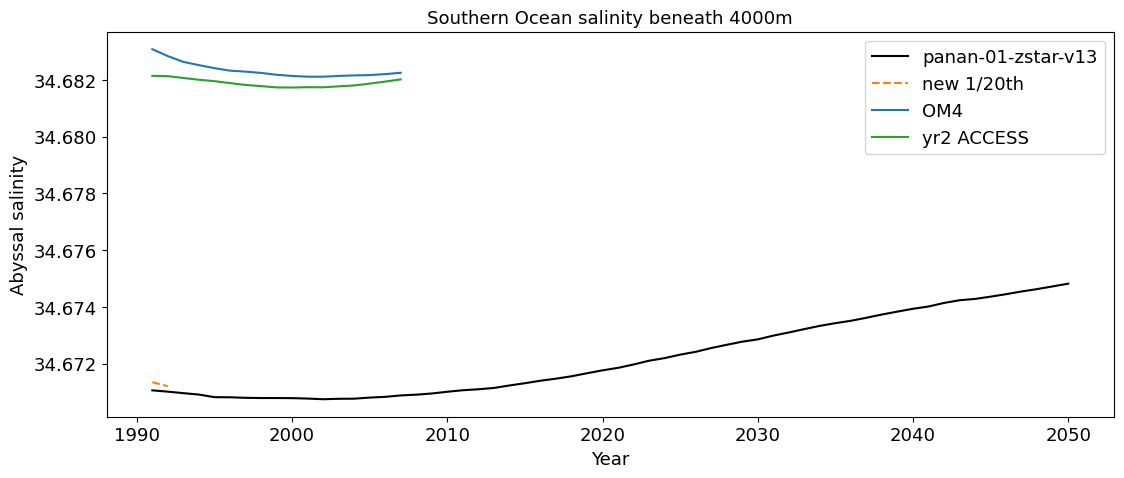

In [7]:

# NOT THICKNESS WEIGHTED!!!

fontsize = 13

fig  = plt.figure(1, figsize = (13,5))

# need to fix year coord for plotting:
abyss_temp = cc.querying.getvar('panant-01-zstar-v13', 'so', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2050-12-31')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='panan-01-zstar-v13',color='k')

'''abyss_temp = cc.querying.getvar('panant-v2', 'so', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2000-12-31')
abyss_temp = abyss_temp.sel(z_l=slice(3000,6000)).mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='old 1/20th',color='k',linestyle = '--')'''

abyss_temp = cc.querying.getvar('panant-005-zstar-v13_dt900', 'so', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='new 1/20th',color='C1',linestyle = '--')

abyss_temp = cc.querying.getvar('panan-01-zstar_OM4_IC_BF', 'so', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='OM4',color='C0')

abyss_temp = cc.querying.getvar('panan-01-zstar-yr2forcing', 'so', panan_session, frequency='1 monthly')
abyss_temp = abyss_temp.sel(z_l=slice(4000,6000)).groupby('time.year').mean('time').mean('xh').mean('yh').mean('z_l')
abyss_temp.plot(label='yr2 ACCESS',color='C2')

plt.legend(fontsize=fontsize)
plt.title(r'Southern Ocean salinity beneath 4000m',fontsize=fontsize)
plt.ylabel(r'Abyssal salinity',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)


## Abyssal overturning at 40S

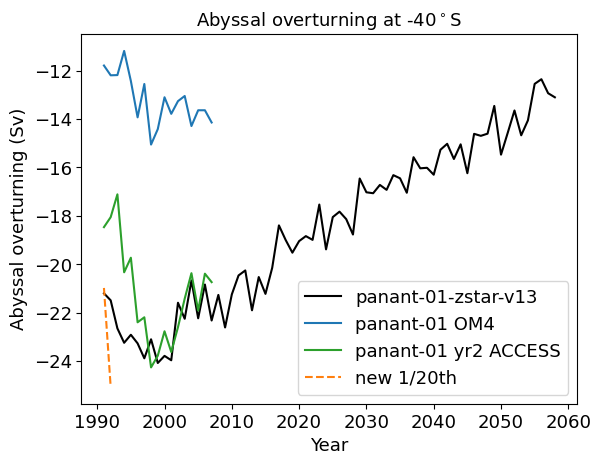

In [8]:
latitude = -40

# old panan-01
psi = cc.querying.getvar('panant-01-zstar-v13', 'vmo', master_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01-zstar-v13',color='k')

# panan-01 OM4
psi = cc.querying.getvar('panan-01-zstar_OM4_IC_BF', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01 OM4',color='C0')

# panan-01 yr2 ACCESS
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01 yr2 ACCESS',color='C2')

# new 1/20th
psi = cc.querying.getvar('panant-005-zstar-v13_dt900', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='new 1/20th',color='C1',linestyle='--')

plt.legend(fontsize=fontsize)
plt.title(r'Abyssal overturning at '+str(latitude)+'$^\circ$S',fontsize=fontsize)
plt.ylabel('Abyssal overturning (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

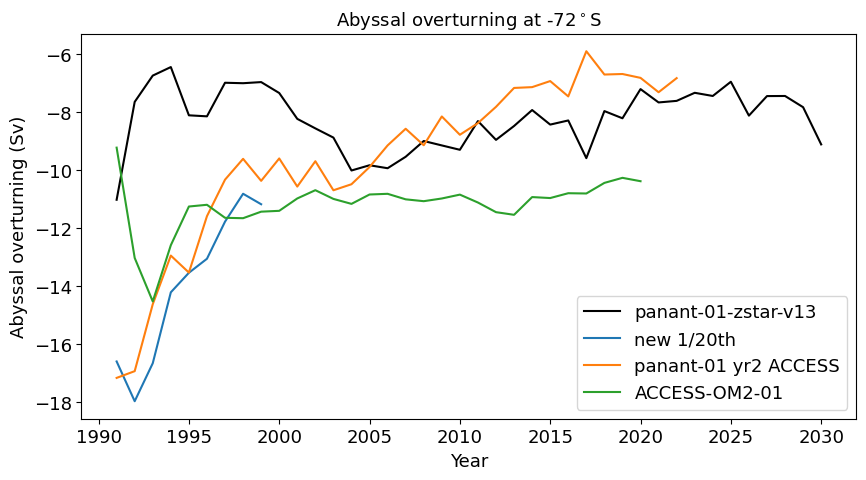

In [9]:
latitude = -72
fontsize=13
plt.figure(figsize=(10,5))

# old panan-01
psi = cc.querying.getvar('panant-01-zstar-v13', 'vmo', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2030-12-31')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01-zstar-v13',color='k')

# new 1/20th
psi = cc.querying.getvar('panan_005deg_jra55_ryf', 'vmo', twentieth_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='new 1/20th',color='C0')

# panan-01 yr2 ACCESS
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01 yr2 ACCESS',color='C1')

# ACCESS-OM2, 01deg_jra55v13_ryf9091
# only 3 monthly ty_trans_rho data is available for first 50 years:
psi = cc.querying.getvar('01deg_jra55v13_ryf9091', 'ty_trans_rho', master_session, frequency='3 monthly',
                         start_time='1900-01-01',end_time='1930-01-01')
psi = psi.sel(grid_yu_ocean=latitude, method='nearest').sel(potrho=slice(1036.5, None)).sum('grid_xt_ocean').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('potrho'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='potrho').compute()/1e9
# shift time axis so it aligns with RYF:
abyss_psi_panan['year'] = abyss_psi_panan.year.values + 91
abyss_psi_panan.plot(label='ACCESS-OM2-01',color='C2')

plt.legend(fontsize=fontsize)
plt.title(r'Abyssal overturning at '+str(latitude)+'$^\circ$S',fontsize=fontsize)
plt.ylabel('Abyssal overturning (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

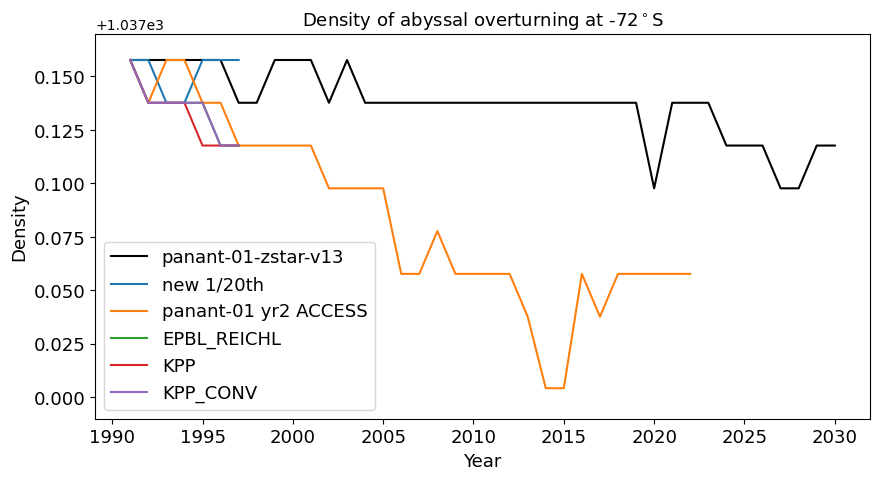

In [25]:
# density of overturning at 72S:

latitude = -72
fontsize=13
plt.figure(figsize=(10,5))

# old panan-01
psi = cc.querying.getvar('panant-01-zstar-v13', 'vmo', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2030-12-31')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='panant-01-zstar-v13',color='k')

# new 1/20th
psi = cc.querying.getvar('panan_005deg_jra55_ryf', 'vmo', twentieth_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='new 1/20th',color='C0')

# panan-01 yr2 ACCESS
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='panant-01 yr2 ACCESS',color='C1')

# panan-01-zstar-yr2forcing_EPBL_REICHL
psi = cc.querying.getvar('panan-01-zstar-yr2forcing_EPBL_REICHL', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='EPBL_REICHL',color='C2',zorder=3)

# panan-01-zstar-yr2forcing_EPBL_REICHL
psi = cc.querying.getvar('panan-01-zstar-yr2forcing_KPP', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='KPP',color='C3')

# panan-01-zstar-yr2forcing_EPBL_REICHL
psi = cc.querying.getvar('panan-01-zstar-yr2forcing_KPP_CONV', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
density_min = abyss_psi_panan.idxmin(dim='rho2_l').compute()
density_min.plot(label='KPP_CONV',color='C4')

plt.legend(fontsize=fontsize)
plt.ylim(1036.99,1037.17)
plt.title(r'Density of abyssal overturning at '+str(latitude)+'$^\circ$S',fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

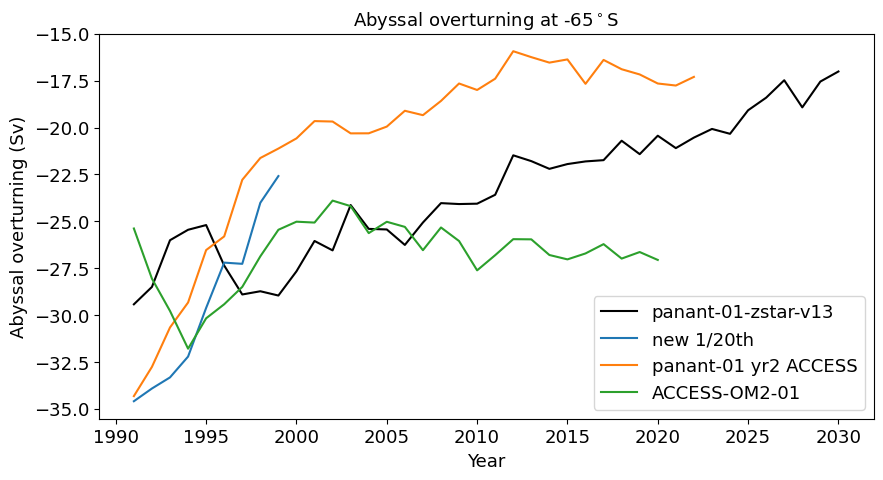

In [10]:
latitude = -65
fontsize=13
plt.figure(figsize=(10,5))

# old panan-01
psi = cc.querying.getvar('panant-01-zstar-v13', 'vmo', master_session, frequency='1 monthly',start_time='1991-01-01',end_time='2030-12-31')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01-zstar-v13',color='k')

# new 1/20th
psi = cc.querying.getvar('panan_005deg_jra55_ryf', 'vmo', twentieth_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='new 1/20th',color='C0')

# panan-01 yr2 ACCESS
psi = cc.querying.getvar('panan-01-zstar-yr2forcing', 'vmo', panan_session, frequency='1 monthly')
psi = psi.sel(yq=latitude, method='nearest').sel(rho2_l=slice(1036.5, None)).sum('xh').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('rho2_l'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='rho2_l').compute()/1e9
abyss_psi_panan.plot(label='panant-01 yr2 ACCESS',color='C1')

# ACCESS-OM2, 01deg_jra55v13_ryf9091
# only 3 monthly ty_trans_rho data is available for first 50 years:
psi = cc.querying.getvar('01deg_jra55v13_ryf9091', 'ty_trans_rho', master_session, frequency='3 monthly',
                         start_time='1900-01-01',end_time='1930-01-01')
psi = psi.sel(grid_yu_ocean=latitude, method='nearest').sel(potrho=slice(1036.5, None)).sum('grid_xt_ocean').groupby('time.year').mean('time')
abyss_psi_panan = -(psi[:,::-1].cumsum('potrho'))[:,::-1]
abyss_psi_panan = abyss_psi_panan.min(dim='potrho').compute()/1e9
# shift time axis so it aligns with RYF:
abyss_psi_panan['year'] = abyss_psi_panan.year.values + 91
abyss_psi_panan.plot(label='ACCESS-OM2-01',color='C2')

plt.legend(fontsize=fontsize)
plt.title(r'Abyssal overturning at '+str(latitude)+'$^\circ$S',fontsize=fontsize)
plt.ylabel('Abyssal overturning (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Upper overturning

In [16]:
# ACCESS-OM2, 01deg_jra55v13_ryf9091

# only 3 monthly ty_trans_rho data is available for first 50 years:
psi1 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'ty_trans_rho', master_session, frequency='3 monthly',
                         start_time='1900-01-01',end_time='1950-01-01')
psi1 = psi1.sel(grid_yu_ocean=-37, method='nearest').groupby('time.year').mean('time').sum('grid_xt_ocean')

# append with 1 monthly data after year 50:
psi2 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'ty_trans_rho', master_session, frequency='1 monthly',
                         start_time='1950-01-01',end_time='2000-01-01')
psi2 = psi2.sel(grid_yu_ocean=-37, method='nearest').groupby('time.year').mean('time').sum('grid_xt_ocean')

psi = xr.concat([psi1,psi2],dim='year')

upper_psi_ryf = psi.cumsum('potrho') - psi.sum('potrho')
upper_psi_ryf = upper_psi_ryf.max(dim='potrho').compute()/1e9

In [17]:
# mom6 zstar

psi = cc.querying.getvar('global-01-v2', 'vmo', master_session, frequency='1 monthly')

psi = psi.sel(yq=-37, method='nearest').groupby('time.year').mean('time').sum('xh')

upper_psi_mom6_global = psi.cumsum('rho2_l') - psi.sum('rho2_l')
upper_psi_mom6_global = upper_psi_mom6_global.max(dim='rho2_l').compute()/1e9

# shift time axis so it aligns with RYF:
upper_psi_mom6_global['year'] = upper_psi_mom6_global.year.values - 91

In [18]:
# mom6 hycom

psi = cc.querying.getvar('global-01-v3', 'vmo', master_session, frequency='1 monthly')

# check if final year is complete:
last_month = psi.time[-1].dt.month.values

psi = psi.sel(yq=-37, method='nearest').groupby('time.year').mean('time').sum('xh')

upper_psi_mom6_global_hycom = psi.cumsum('rho2_l') - psi.sum('rho2_l')
upper_psi_mom6_global_hycom = upper_psi_mom6_global_hycom.max(dim='rho2_l').compute()/1e9

# shift time axis so it aligns with RYF:
upper_psi_mom6_global_hycom['year'] = upper_psi_mom6_global_hycom.year.values - 91

if last_month != 12:
    # cut off last year if not complete:
    upper_psi_mom6_global_hycom = upper_psi_mom6_global_hycom[:-1]

In [19]:
# OM4

psi = cc.querying.getvar('OM4_025.JRA_RYF', 'vmo', master_session, ncfile='%.ocean_month_rho2.nc')
psi = psi.sel(yq=-37, method='nearest').groupby('time.year').mean('time').sum('xh').load()

upper_psi_om4 = psi.cumsum('rho2_l') - psi.sum('rho2_l')
upper_psi_om4 = upper_psi_om4.max(dim='rho2_l').compute()/1e9

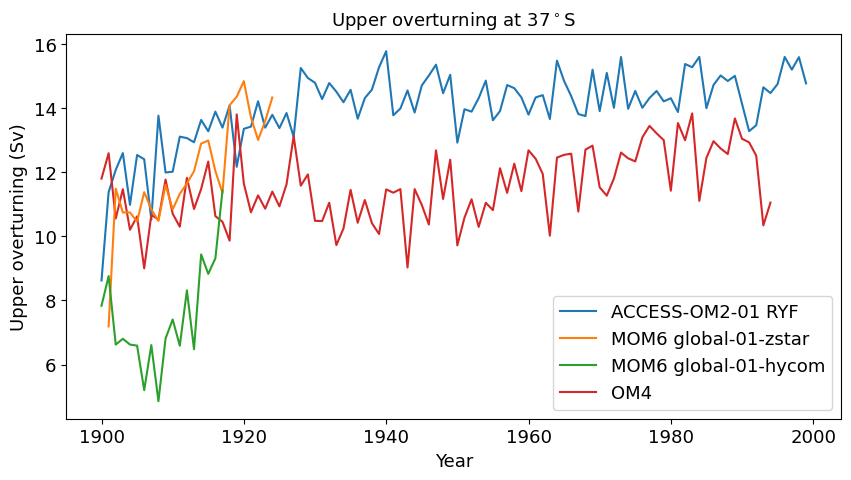

In [20]:
# plot 
fontsize = 13

fig  = plt.figure(1, figsize = (10,5))
upper_psi_ryf.plot(label='ACCESS-OM2-01 RYF')
upper_psi_mom6_global.plot(label='MOM6 global-01-zstar',zorder=3)
upper_psi_mom6_global_hycom.plot(label='MOM6 global-01-hycom',zorder=3)
#upper_psi_panan.plot(label='panan-01')
upper_psi_om4.plot(label='OM4')
plt.legend(fontsize=fontsize)
plt.title(r'Upper overturning at 37$^\circ$S',fontsize=fontsize)
plt.ylabel('Upper overturning (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Abyssal ocean salinity, south of 37S, below 3000m

In [14]:
# ACCESS-OM2 thickness and area for depth averaging (not time varying):

lat_slice = slice(-82,-37)

temp_con = cc.querying.getvar('01deg_jra55v13_ryf9091','temp' , master_session,frequency='3 monthly', n=1)
temp_con = temp_con.sel(yt_ocean=lat_slice)
# import edges of st_ocean and add lat/lon dimensions:
st_edges_ocean = cc.querying.getvar('01deg_jra55v13_ryf9091', 'st_edges_ocean', master_session, n=1)
st_edges_array = st_edges_ocean.expand_dims({'yt_ocean':temp_con.yt_ocean,'xt_ocean':temp_con.xt_ocean}, axis=[1,2])

# adjust edges at bottom for partial thickness:
ht = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , master_session,n=1).sel(yt_ocean=lat_slice)
st_edges_with_partial = st_edges_array.where(st_edges_array<ht, other=ht)
thickness = st_edges_with_partial.diff(dim='st_edges_ocean')

# change coordinate of thickness to st_ocean (needed for multipling with other variables):
st_ocean = cc.querying.getvar('01deg_jra55v13_ryf9091', 'st_ocean', master_session, n=1)
thickness['st_edges_ocean'] = st_ocean.values
thickness = thickness.rename(({'st_edges_ocean':'st_ocean'}))

In [15]:
area_t = cc.querying.getvar('01deg_jra55v13_ryf9091','area_t',master_session, ncfile = 'ocean_grid.nc',n=-1)
area_t = area_t.sel(yt_ocean=lat_slice)
volume = area_t*thickness.sel(st_ocean=slice(3000,6000))
volume = volume.load()
volume_sum = volume.sum()
volume_sum = volume_sum.load()

In [16]:
# ACCESS-OM2, 01deg_jra55v13_ryf9091

abyss_salt_ryf1 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'salt', master_session, frequency='3 monthly',
                         start_time='1900-01-01',end_time='1950-01-01')
abyss_salt_ryf1 = abyss_salt_ryf1.sel(yt_ocean=lat_slice).sel(st_ocean=slice(3000,6000)).groupby('time.year').mean('time')

# append with 1 monthly data after year 50:
abyss_salt_ryf2 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'salt', master_session, frequency='1 monthly',
                         start_time='1950-01-01',end_time='2000-01-01')
abyss_salt_ryf2 = abyss_salt_ryf2.sel(yt_ocean=lat_slice).sel(st_ocean=slice(3000,6000)).groupby('time.year').mean('time')

abyss_salt_ryf = xr.concat([abyss_salt_ryf1,abyss_salt_ryf2],dim='year')

# volume average:
abyss_salt_ryf = ((abyss_salt_ryf*volume).sum('xt_ocean').sum('yt_ocean').sum('st_ocean')/volume_sum).load()

In [17]:
# mom6 zstar

abyss_salt_mom6_global = cc.querying.getvar('global-01-v2', 'so', master_session, frequency='1 monthly')
abyss_salt_mom6_global = abyss_salt_mom6_global.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')

volcello = cc.querying.getvar('global-01-v2', 'volcello', master_session,ncfile='%.ocean_month_z.nc')
volcello = volcello.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')
volume_sum = volcello.isel(year=0).sum().compute()

# volume average:
abyss_salt_mom6_global = ((abyss_salt_mom6_global*volcello).sum('xh').sum('yh').sum('z_l')).load()/volume_sum

# shift time axis so it aligns with RYF:
abyss_salt_mom6_global['year'] = abyss_salt_mom6_global.year.values - 91

In [18]:
# mom6 hycom

abyss_salt_mom6_global_hycom = cc.querying.getvar('global-01-v3', 'so', master_session, frequency='1 monthly')
abyss_salt_mom6_global_hycom = abyss_salt_mom6_global_hycom.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')

volcello = cc.querying.getvar('global-01-v3', 'volcello', master_session,ncfile='%.ocean_month_z.nc')
volcello = volcello.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')
volume_sum = volcello.isel(year=0).sum().compute()

# volume average:
abyss_salt_mom6_global_hycom = ((abyss_salt_mom6_global_hycom*volcello).sum('xh').sum('yh').sum('z_l')).load()/volume_sum

# shift time axis so it aligns with RYF:
abyss_salt_mom6_global_hycom['year'] = abyss_salt_mom6_global_hycom.year.values - 91

In [19]:
# OM4

abyss_salt_om4 = cc.querying.getvar('OM4_025.JRA_RYF', 'so', master_session, ncfile='%.ocean_month_z.nc')
abyss_salt_om4 = abyss_salt_om4.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')

volcello = cc.querying.getvar('OM4_025.JRA_RYF', 'volcello', master_session,ncfile='%.ocean_month_z.nc')
volcello = volcello.sel(yh=lat_slice).sel(z_l=slice(3000,6000)).groupby('time.year').mean('time')
volume_sum = volcello.isel(year=0).sum().compute()

# volume average:
abyss_salt_om4 = ((abyss_salt_om4*volcello).sum('xh').sum('yh').sum('z_l')).compute()/volume_sum

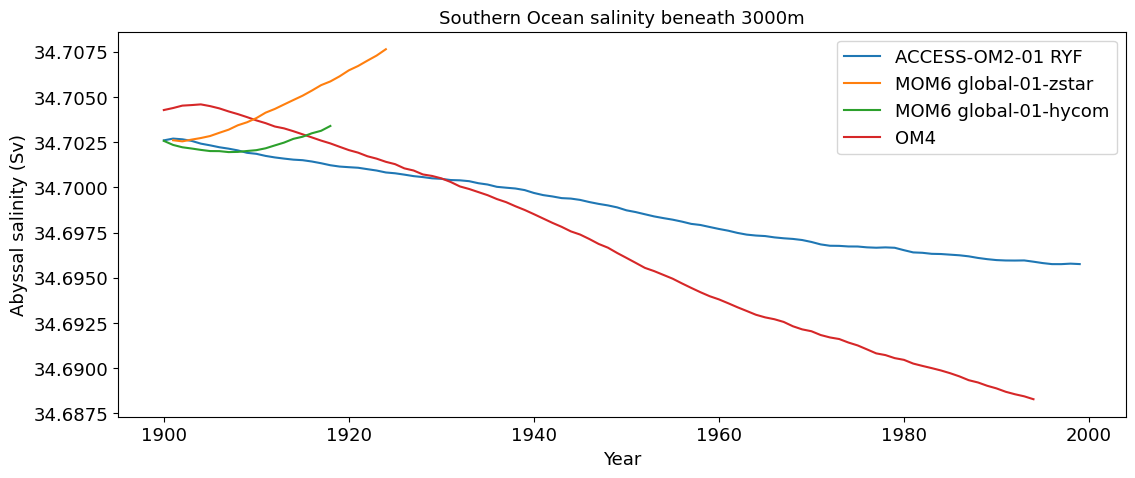

In [20]:
# plot 
fontsize = 13

fig  = plt.figure(1, figsize = (13,5))
abyss_salt_ryf.plot(label='ACCESS-OM2-01 RYF')
abyss_salt_mom6_global.plot(label='MOM6 global-01-zstar',zorder=3)
abyss_salt_mom6_global_hycom.plot(label='MOM6 global-01-hycom',zorder=3)
#abyss_salt_panan_zstar_v13.plot(label='panan-01-zstar-v13')
#abyss_salt_panan_hycom_v13.plot(label='panan-01-hycom1-v13')
#abyss_salt_panan_zstar_v1.plot(label='panan-01-zstar (v1)')
#abyss_salt_panan_v2.plot(label='panan-005-zstar (v1)')
abyss_salt_om4.plot(label='OM4')
plt.legend(fontsize=fontsize)
plt.title(r'Southern Ocean salinity beneath 3000m',fontsize=fontsize)
plt.ylabel('Abyssal salinity (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Upper ocean temperature, south of 37S, above 500m

In [ ]:
# ACCESS-OM2 thickness and area for depth averaging (not time varying):

temp_con = cc.querying.getvar('01deg_jra55v13_ryf9091','temp' , master_session,frequency='3 monthly', n=1)
temp_con = temp_con.sel(yt_ocean=lat_slice)
# import edges of st_ocean and add lat/lon dimensions:
st_edges_ocean = cc.querying.getvar('01deg_jra55v13_ryf9091', 'st_edges_ocean', master_session, n=1)
st_edges_array = st_edges_ocean.expand_dims({'yt_ocean':temp_con.yt_ocean,'xt_ocean':temp_con.xt_ocean}, axis=[1,2])

# adjust edges at bottom for partial thickness:
ht = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , master_session,n=1).sel(yt_ocean=lat_slice)
st_edges_with_partial = st_edges_array.where(st_edges_array<ht, other=ht)
thickness = st_edges_with_partial.diff(dim='st_edges_ocean')

# change coordinate of thickness to st_ocean (needed for multipling with other variables):
st_ocean = cc.querying.getvar('01deg_jra55v13_ryf9091', 'st_ocean', master_session, n=1)
thickness['st_edges_ocean'] = st_ocean.values
thickness = thickness.rename(({'st_edges_ocean':'st_ocean'}))

In [ ]:
area_t = cc.querying.getvar('01deg_jra55v13_ryf9091','area_t',master_session, ncfile = 'ocean_grid.nc',n=-1)
area_t = area_t.sel(yt_ocean=lat_slice)
volume = area_t*thickness.sel(st_ocean=slice(0,500))
volume = volume.load()
volume_sum = volume.sum()
volume_sum = volume_sum.load()

In [ ]:
# ACCESS-OM2, 01deg_jra55v13_ryf9091

upper_temp_ryf = cc.querying.getvar('01deg_jra55v13_ryf9091', 'temp', master_session, frequency='3 monthly',
                         start_time='1900-01-01',end_time='1950-01-01') - 273.15
upper_temp_ryf = upper_temp_ryf.sel(yt_ocean=lat_slice).sel(st_ocean=slice(0,500)).groupby('time.year').mean('time')

# volume average:
upper_temp_ryf = ((upper_temp_ryf*volume).sum('xt_ocean').sum('yt_ocean').sum('st_ocean')/volume_sum).compute()

In [ ]:
# mom6

upper_temp_mom6_global = cc.querying.getvar('global-01-v2', 'thetao', master_session, frequency='1 monthly')
upper_temp_mom6_global = upper_temp_mom6_global.sel(yh=lat_slice).sel(z_l=slice(0,500)).groupby('time.year').mean('time')

volcello = cc.querying.getvar('global-01-v2', 'volcello', master_session,ncfile='%.ocean_month_z.nc')
volcello = volcello.sel(yh=lat_slice).sel(z_l=slice(0,500)).groupby('time.year').mean('time')
volume_sum = volcello.isel(year=0).sum().compute()

# volume average:
upper_temp_mom6_global = ((upper_temp_mom6_global*volcello).sum('xh').sum('yh').sum('z_l')).compute()/volume_sum

# shift time axis so it aligns with RYF:
upper_temp_mom6_global['year'] = upper_temp_mom6_global.year.values - 91

In [ ]:
# panan

upper_temp_panan = cc.querying.getvar('panant-01-zstar-v13', 'thetao', master_session, frequency='1 monthly')
upper_temp_panan = upper_temp_panan.sel(yh=lat_slice).sel(z_l=slice(0,500)).groupby('time.year').mean('time')

volcello = cc.querying.getvar('panant-01-zstar-v13', 'volcello', master_session,ncfile='%.ocean_month_z.nc')
volcello = volcello.sel(yh=lat_slice).sel(z_l=slice(0,500)).groupby('time.year').mean('time')
volume_sum = volcello.isel(year=0).sum().compute()

# volume average:
upper_temp_panan = ((upper_temp_panan*volcello).sum('xh').sum('yh').sum('z_l')).compute()/volume_sum

# shift time axis so it aligns with RYF:
upper_temp_panan['year'] = upper_temp_panan.year.values - 91

In [ ]:
# plot 
fontsize = 13

fig  = plt.figure(1, figsize = (13,5))
upper_temp_mom6_global.plot(label='MOM6 global-01-v2',zorder=3)
upper_temp_ryf.plot(label='ACCESS-OM2-01 RYF')
upper_temp_panan.plot(label='panan-01')
plt.legend(fontsize=fontsize)
plt.title(r'Southern Ocean temperature beneath 3000m',fontsize=fontsize)
plt.ylabel('Abyssal temperature (Sv)',fontsize=fontsize)
plt.xlabel('Year',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

## Antarctic shelf SWMT